### Importación de datos



In [57]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



## Ingreso total por cada tienda

Ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


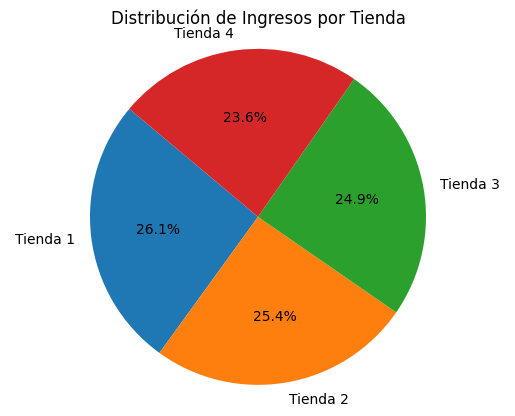

In [10]:
import matplotlib.pyplot as plt

# Ingresos por tienda
ingresos = {
    "Tienda 1": tienda['Precio'].sum(),
    "Tienda 2": tienda2['Precio'].sum(),
    "Tienda 3": tienda3['Precio'].sum(),
    "Tienda 4": tienda4['Precio'].sum()
}

print("Ingresos totales por tienda:")
for tienda, ingreso in ingresos.items():
    print(f"{tienda}: {ingreso}")

# Gráfica de pastel
labels = list(ingresos.keys())  # Nombres de las tiendas
sizes = list(ingresos.values())  # Ingresos de cada tienda

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')   # Hace que el círculo sea un círculo, en lugar de un óvalo

plt.title("Distribución de Ingresos por Tienda")
plt.show()


# 2. Ventas por categoría

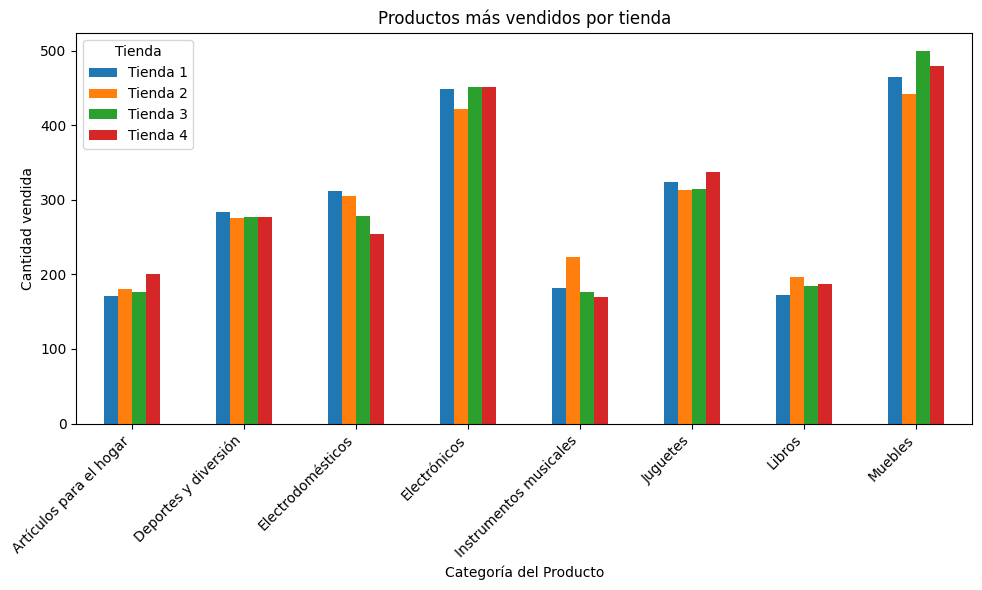

In [27]:
# Primero combinamos en un DataFrame
conteos = pd.DataFrame({
    'Tienda 1': tienda['Categoría del Producto'].value_counts(),
    'Tienda 2': tienda2['Categoría del Producto'].value_counts(),
    'Tienda 3': tienda3['Categoría del Producto'].value_counts(),
    'Tienda 4': tienda4['Categoría del Producto'].value_counts()
}).fillna(0)

# Gráfico de barras agrupadas
ax = conteos.plot(kind='bar', figsize=(10, 6), title='Productos más vendidos por tienda')
ax.set_xlabel('Categoría del Producto')
ax.set_ylabel('Cantidad vendida')
ax.legend(title='Tienda')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [16]:
promedio_tienda = tienda['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio Tienda 1: {promedio_tienda:.2f}")
print(f"Calificación promedio Tienda 2: {promedio_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {promedio_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {promedio_tienda4:.2f}")


Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


<Figure size 1000x600 with 0 Axes>

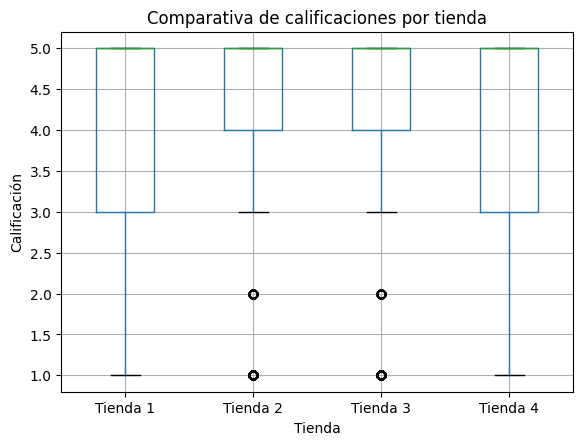

In [39]:
tienda_new = tienda.copy()
tienda_new['Tienda'] = 'Tienda 1'

tienda2_new = tienda2.copy()
tienda2_new['Tienda'] = 'Tienda 2'

tienda3_new = tienda3.copy()
tienda3_new['Tienda'] = 'Tienda 3'

tienda4_new = tienda4.copy()
tienda4_new['Tienda'] = 'Tienda 4'

# Unirlos
consolidado = pd.concat([tienda_new, tienda2_new, tienda3_new, tienda4_new])

# Boxplot comparativa
plt.figure(figsize=(10,6))
consolidado.boxplot(column='Calificación', by='Tienda')
plt.title('Comparativa de calificaciones por tienda')
plt.suptitle('');
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.show()

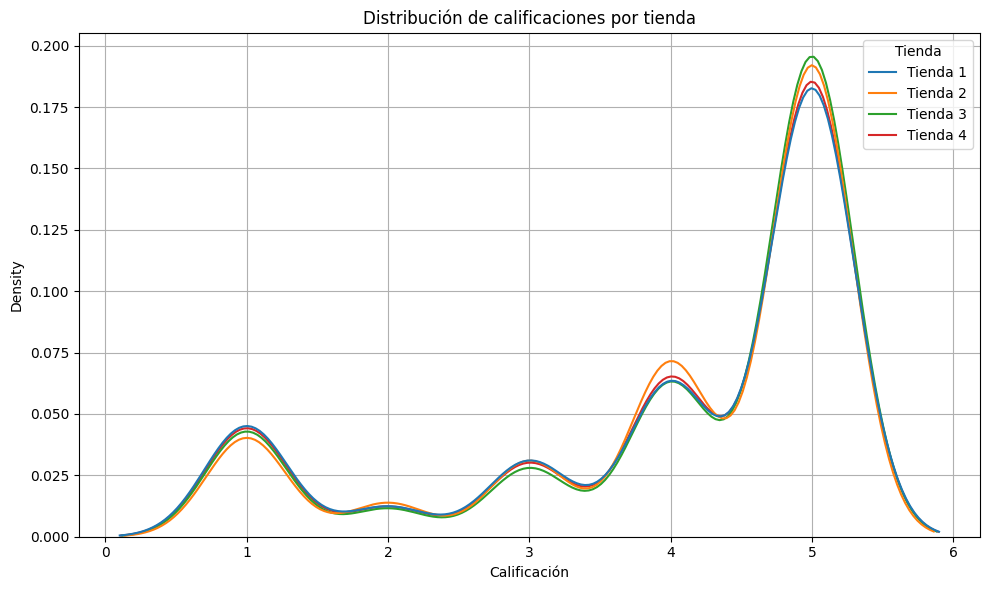

In [31]:
import seaborn as sns

# Unificar los DataFrames si aún no lo has hecho
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

frames = [tienda, tienda2, tienda3, tienda4]
combined = pd.concat(frames)

plt.figure(figsize=(10,6))
sns.kdeplot(data=combined, x='Calificación', hue='Tienda', fill=False)
plt.title('Distribución de calificaciones por tienda')
plt.xlabel('Calificación')
plt.grid(True)
plt.tight_layout()
plt.show()

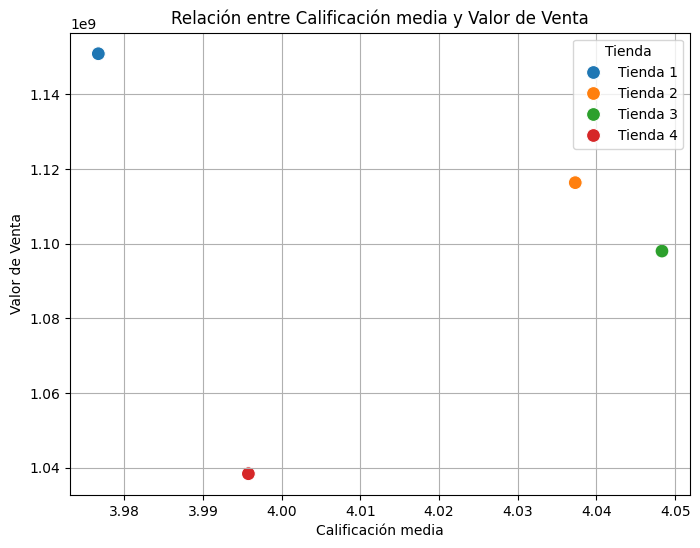

In [41]:
calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# Creamos un DataFrame resumido:
resumen = pd.DataFrame.from_dict(ingresos, orient='index', columns=['Valor de Venta'])

resumen['Calificación media'] = pd.Series(calificaciones)

resumen = resumen.reset_index().rename(columns={'index': 'Tienda'})

# Gráfico de dispersión:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=resumen, x='Calificación media', y='Valor de Venta', hue='Tienda', s=100)
ax.set_title('Relación entre Calificación media y Valor de Venta')
ax.set_xlabel('Calificación media')
ax.set_ylabel('Valor de Venta')

plt.legend(title='Tienda')
plt.grid(True)
plt.show()

# 4. Productos más y menos vendidos

In [42]:
# Más vendidos y menos vendidos en cada tienda
for nombre, df in [("Tienda 1", tienda), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]:
    conteo = df['Producto'].value_counts()
    print(f'{nombre} - Producto más vendido:\n{conteo.head(1)}')
    print(f'{nombre} - Producto menos vendido:\n{conteo.tail(1)}\n')


Tienda 1 - Producto más vendido:
Producto
Microondas    60
Name: count, dtype: int64
Tienda 1 - Producto menos vendido:
Producto
Celular ABXY    33
Name: count, dtype: int64

Tienda 2 - Producto más vendido:
Producto
Iniciando en programación    65
Name: count, dtype: int64
Tienda 2 - Producto menos vendido:
Producto
Juego de mesa    32
Name: count, dtype: int64

Tienda 3 - Producto más vendido:
Producto
Kit de bancas    57
Name: count, dtype: int64
Tienda 3 - Producto menos vendido:
Producto
Bloques de construcción    35
Name: count, dtype: int64

Tienda 4 - Producto más vendido:
Producto
Cama box    62
Name: count, dtype: int64
Tienda 4 - Producto menos vendido:
Producto
Guitarra eléctrica    33
Name: count, dtype: int64



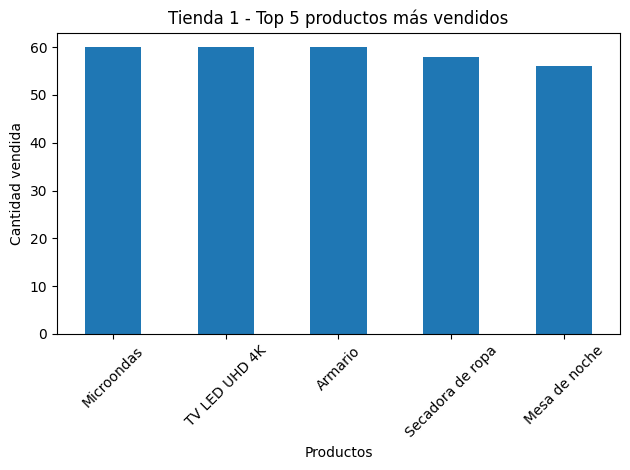

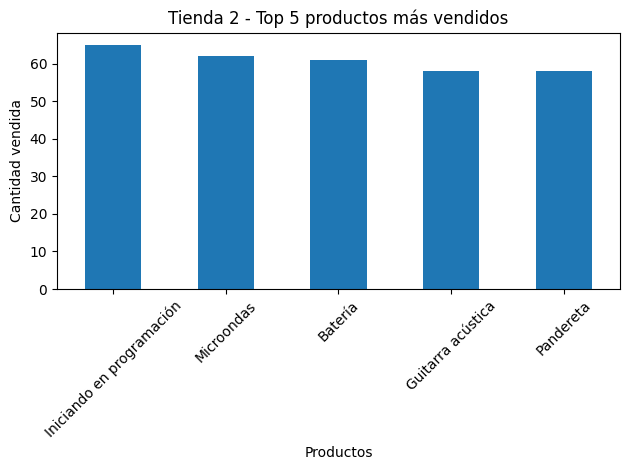

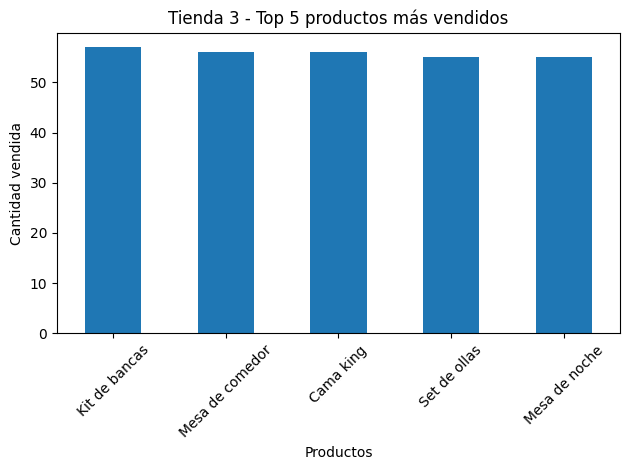

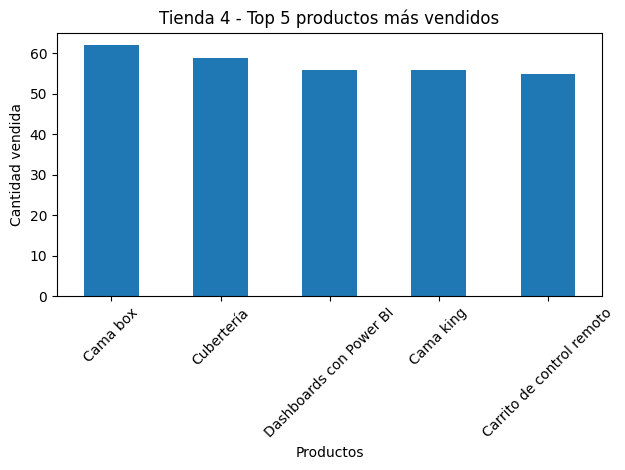

In [43]:
# Graficar el Top 5 más vendidos de cada tienda
for nombre, df in [("Tienda 1", tienda), ("Tienda 2", tienda2), ("Tienda 3", tienda3), ("Tienda 4", tienda4)]:
    conteo = df['Producto'].value_counts().head(5)
    conteo.plot(kind='bar', title=f'{nombre} - Top 5 productos más vendidos')
    plt.xlabel('Productos')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


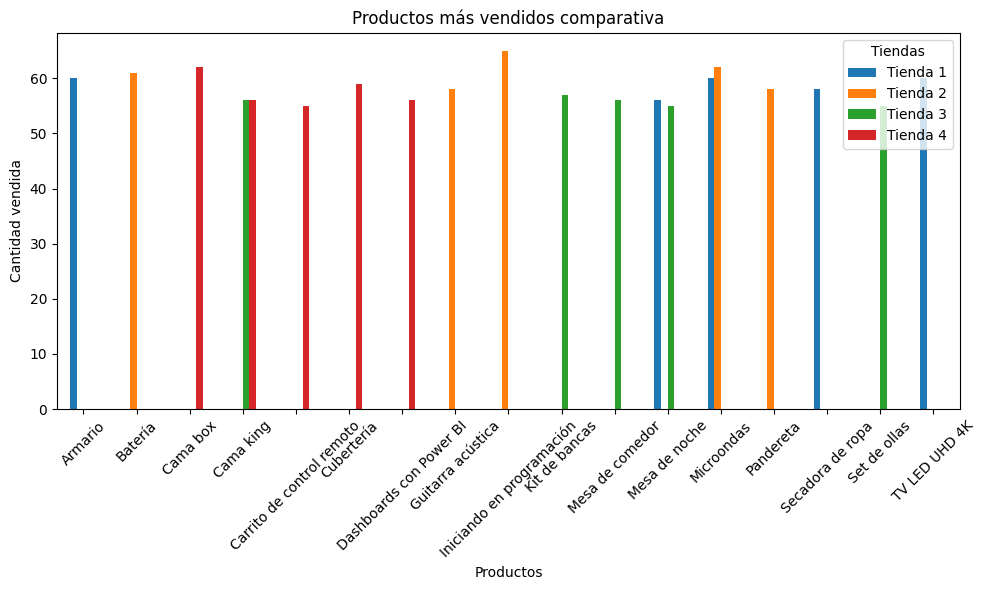

In [45]:
# Obtener el Top 5 más vendidos de cada tienda
top_tienda1 = tienda['Producto'].value_counts().head(5)
top_tienda2 = tienda2['Producto'].value_counts().head(5)
top_tienda3 = tienda3['Producto'].value_counts().head(5)
top_tienda4 = tienda4['Producto'].value_counts().head(5)

# Unificar en un DataFrame para compararlos
import pandas as pd

df_top = pd.DataFrame({'Tienda 1': top_tienda1,
                       'Tienda 2': top_tienda2,
                       'Tienda 3': top_tienda3,
                       'Tienda 4': top_tienda4}).fillna(0)

# Gráfica comparativa
ax = df_top.plot(kind='bar', figsize=(10,6), title='Productos más vendidos comparativa')
ax.set_xlabel("Productos")
ax.set_ylabel("Cantidad vendida")
ax.legend(title='Tiendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

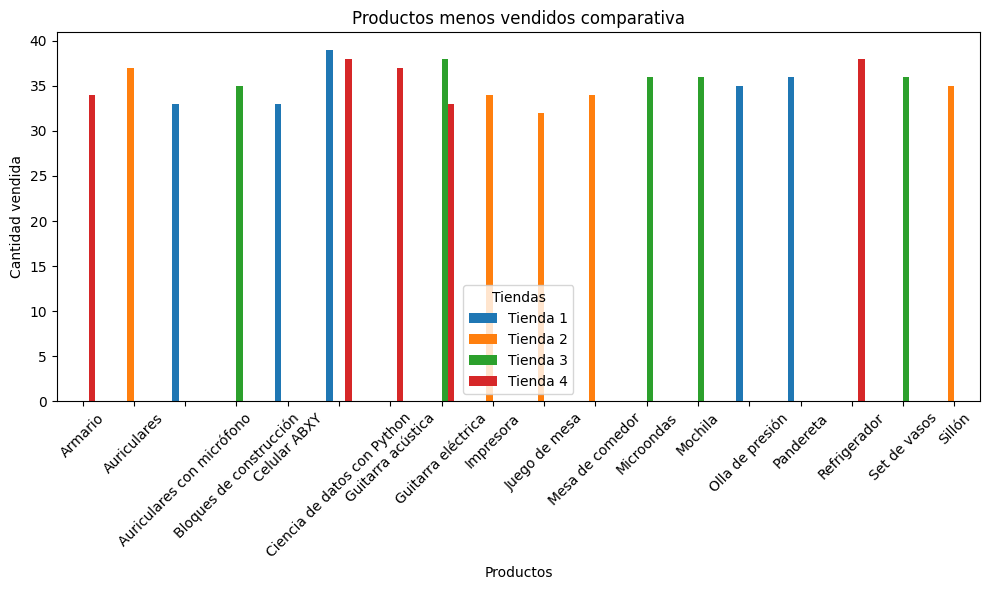

In [46]:
# Obtener el Top 5 menos vendidos de cada tienda
bottom_tienda1 = tienda['Producto'].value_counts().tail(5)
bottom_tienda2 = tienda2['Producto'].value_counts().tail(5)
bottom_tienda3 = tienda3['Producto'].value_counts().tail(5)
bottom_tienda4 = tienda4['Producto'].value_counts().tail(5)

# Unificar en un DataFrame para compararlos
df_bottom = pd.DataFrame({'Tienda 1': bottom_tienda1,
                         'Tienda 2': bottom_tienda2,
                         'Tienda 3': bottom_tienda3,
                         'Tienda 4': bottom_tienda4}).fillna(0)

# Gráfica comparativa
ax = df_bottom.plot(kind='bar', figsize=(10,6), title='Productos menos vendidos comparativa')
ax.set_xlabel("Productos")
ax.set_ylabel("Cantidad vendida")
ax.legend(title='Tiendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [50]:
# Costo de envío medio por tienda
costo_envio_promedio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo Envío Promedio': [
        tienda['Costo de envío'].mean(),
        tienda2['Costo de envío'].mean(),
        tienda3['Costo de envío'].mean(),
        tienda4['Costo de envío'].mean()
    ]
})

# Visualizamos el resultado
print("Costo de envío promedio por tienda:")
print(costo_envio_promedio)


Costo de envío promedio por tienda:
     Tienda  Costo Envío Promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


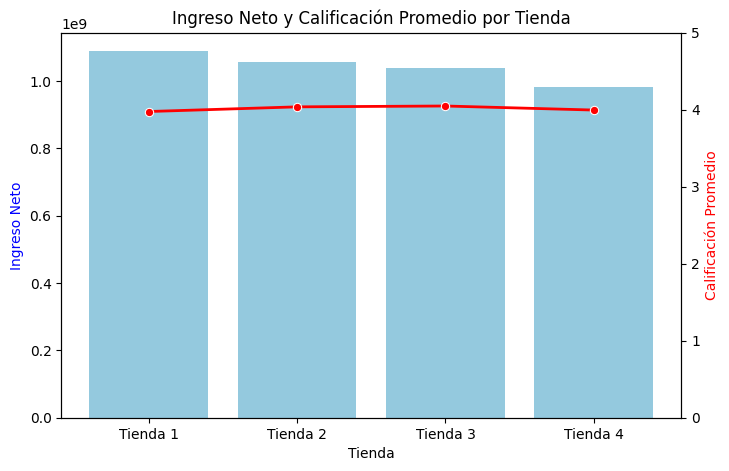

In [52]:
# Calcular ingreso total por tienda
ventas_totales = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

# Número total de ventas por tienda
ventas_cantidad = [
    len(tienda),
    len(tienda2),
    len(tienda3),
    len(tienda4)
]

# Costo de envío promedio por tienda
costo_envio_promedio = [
    tienda['Costo de envío'].mean(),
    tienda2['Costo de envío'].mean(),
    tienda3['Costo de envío'].mean(),
    tienda4['Costo de envío'].mean()
]

# Calificación promedio por tienda
calificacion_promedio = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

# Calcular ingreso neto = ventas totales - (costo promedio * cantidad ventas)
ingreso_neto = [ventas_totales[i] - costo_envio_promedio[i]*ventas_cantidad[i] for i in range(4)]

# Crear DataFrame para graficar
df = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Neto': ingreso_neto,
    'Calificación Promedio': calificacion_promedio
})

# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(8,5))

# Barras - Ingreso Neto
sns.barplot(x='Tienda', y='Ingreso Neto', data=df, ax=ax1, color='skyblue')
ax1.set_ylabel('Ingreso Neto', color='blue')
ax1.set_title('Ingreso Neto y Calificación Promedio por Tienda')

# Eje secundario para la línea
ax2 = ax1.twinx()
sns.lineplot(x='Tienda', y='Calificación Promedio', data=df, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Calificación Promedio', color='red')
ax2.set_ylim(0, 5)  # para que coincida con escala de calificación

plt.show()

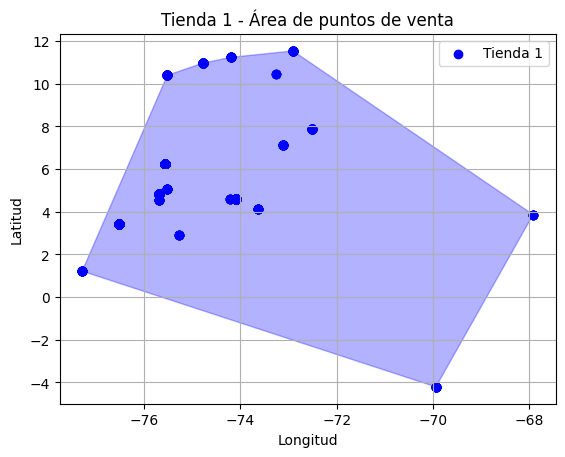

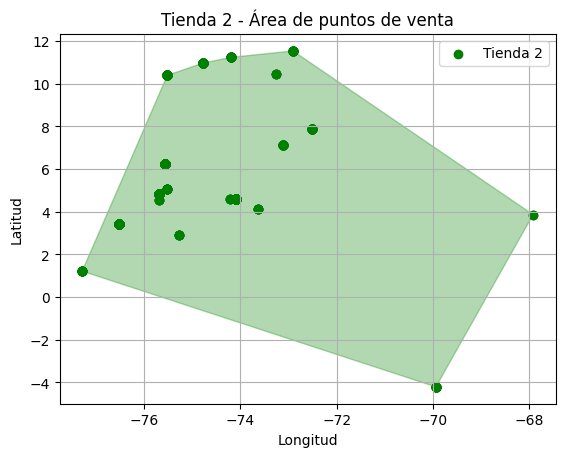

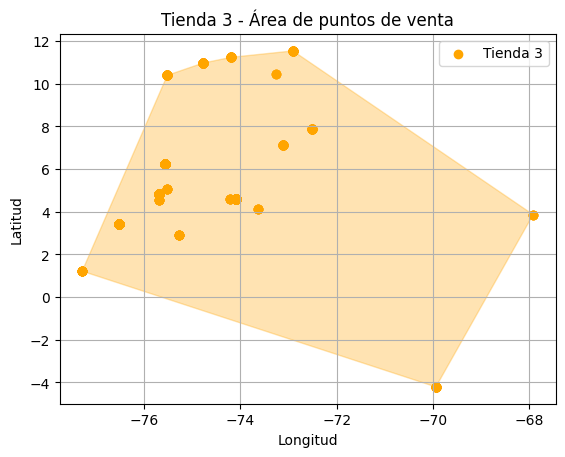

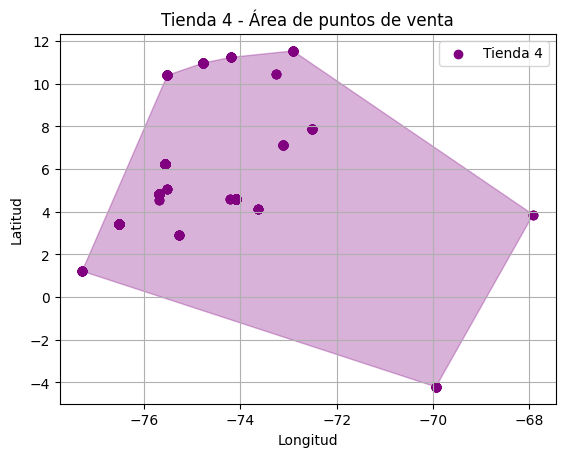

In [58]:
import matplotlib.patches as patches
from scipy.spatial import ConvexHull

def plot_tienda_area(tienda, nombre_tienda, color='blue'):
    """
    Dibuja un scatter plot de la tienda junto con el área que rodea sus puntos.
    """
    # Extraer las coordenadas
    xs = tienda['lon'].tolist()
    ys = tienda['lat'].tolist()

    # Plotear los puntos
    plt.scatter(xs, ys, color=color, label=nombre_tienda)

    # Calcular el polígono convexo que rodea a los puntos
    points = list(zip(xs, ys))
    hull = ConvexHull(points)
    hull_indices = hull.vertices
    hull_polygon = [points[i] for i in hull_indices]

    # Cerrar el polígono
    hull_polygon.append(hull_polygon[0])

    xs_hull, ys_hull = zip(*hull_polygon)
    plt.fill(xs_hull, ys_hull, color=color, alpha=0.3)

    # Agregar leyenda
    plt.legend()


# Graficar cada tienda por separado
plt.figure()
plot_tienda_area(tienda, 'Tienda 1', color='blue')
plt.title("Tienda 1 - Área de puntos de venta")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


plt.figure()
plot_tienda_area(tienda2, 'Tienda 2', color='green')
plt.title("Tienda 2 - Área de puntos de venta")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


plt.figure()
plot_tienda_area(tienda3, 'Tienda 3', color='orange')
plt.title("Tienda 3 - Área de puntos de venta")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


plt.figure()
plot_tienda_area(tienda4, 'Tienda 4', color='purple')
plt.title("Tienda 4 - Área de puntos de venta")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()
